In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DMV Datasets/car_evaluation.csv')

## **Know More about data**

In [ ]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
for col in col_names:
    print(data[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## **EDA**

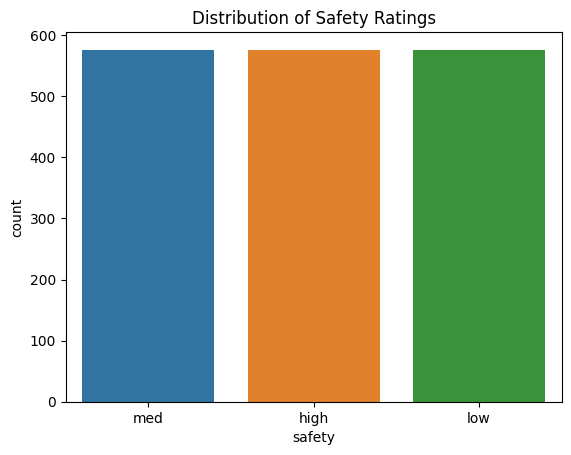

In [ ]:
sns.countplot(x="safety", data=data)
plt.title("Distribution of Safety Ratings")
plt.show()

In [ ]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

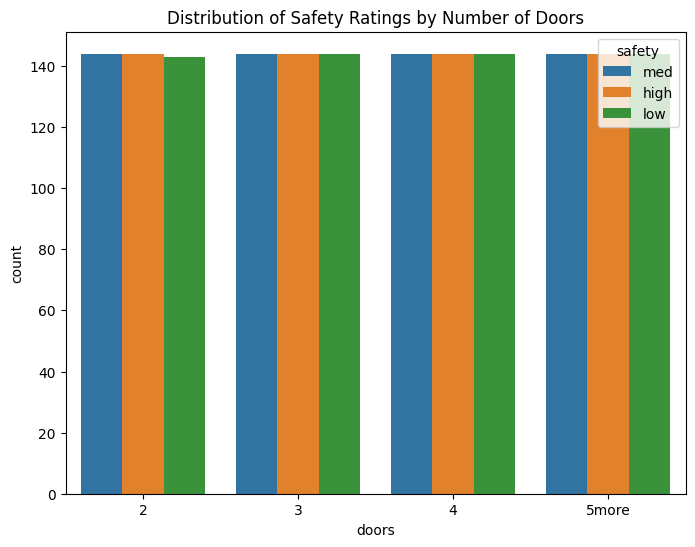

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="doors", data=data, hue="safety")
plt.title("Distribution of Safety Ratings by Number of Doors")
plt.show()

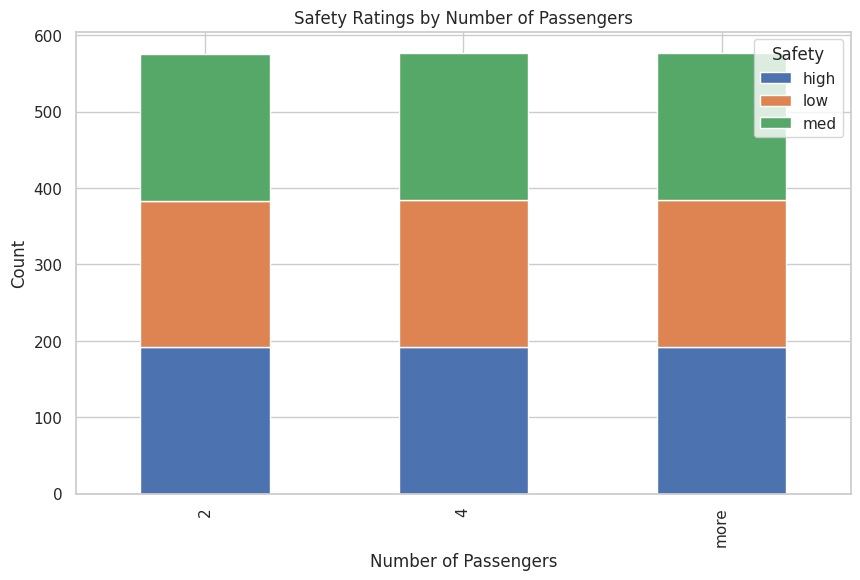

In [ ]:
cross_tab = pd.crosstab(data["persons"], data["safety"])
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
cross_tab.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Safety Ratings by Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Count")
plt.legend(title="Safety")
plt.show()

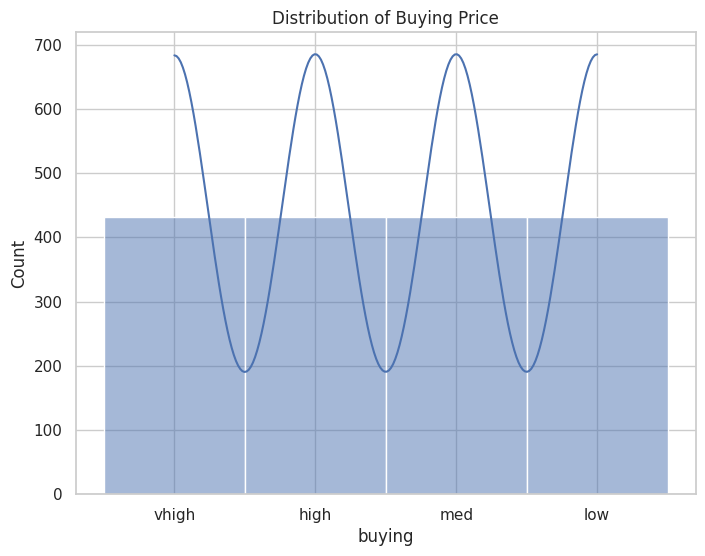

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data["buying"], kde=True, bins=10)
plt.title("Distribution of Buying Price")
plt.show()

In [ ]:
x=data.drop(['class'],axis=1)
y=data['class']

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((1208, 6), (519, 6))

In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
y_pred[:10]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.928709055876686

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_100=rfc_100.predict(x_test)
accuracy_score(y_test,y_pred_100)

0.928709055876686

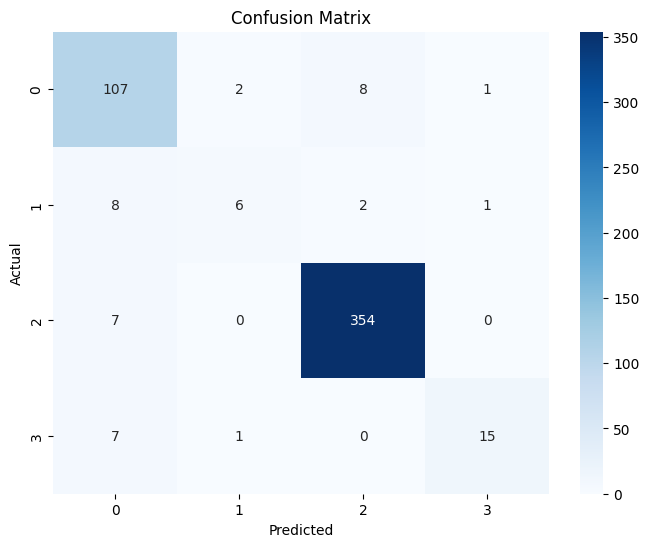

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()